In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale = 2)
import os
from matplotlib.gridspec import GridSpec

In [2]:
Years = pd.read_csv('./GCAM_full/20220421_gcam_production.csv')
Years = Years.columns.values.tolist()[5:-1] ## string
# Scenario = pd.read_csv('./GCAM_full/20220421_gcam_production.csv', usecols=['scenario']).squeeze().unique().tolist()[0:-1]

Trucks = [0.5, 1, 5, 10]
Barges = [0.5, 1, 5, 10]
Rails = [0.5, 1, 5, 10]
Oceans = [0.5, 1, 5, 10]

def sameRate():
    rates = []
    for truck in Trucks:
        for barge in Barges:
             for rail in Rails:
                for ocean in Oceans:
                    if truck == barge == rail == ocean:
                        rates_text = str(truck) + '_' + str(barge) + '_' + str(rail) + '_' + str(ocean)
                        #print(rates_text)
                        rates.append(rates_text)
    rates.insert(2, '1_5_5_5')
    rates.insert(3, '1_5_5_10')
    rates.insert(3, '1_5_10_10')
    rates.insert(3, '1_10_10_10')
    print(rates)
    return rates

scenario = 'SSP2'
root = './Exps/'

In [3]:
#Rates = sameRate()
Rates = ['1_1_1_1','1_10_1_1','1_1_0.5_1','1_1_1_10','10_1_1_1']
Legs = ['S0','S1','S2','S3','S4']
data = pd.DataFrame()
for year in Years:
    path = root + scenario + '/'
    data0 = pd.read_csv(path + 'all_rates_'+ year + '.csv').query('Rates == @Rates')
    data = pd.concat([data,data0])
data['Inventory'] = data['Total_production'] - data['Quantity_X_Facility']- data['Quantity_X_Country_Stream'] - data['Quantity_X_Country_Rail']
data

,Scenario,Year,Rates,OBJ_vaules,Cost_Farmers,Cost_Barges,Cost_Rails,Cost_Oceans,Total_production,Quantity_X_Facility,Quantity_X_Country_Stream,Quantity_X_Country_Rail,Quantity_Y_Stream_Export,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,Demand,Inventory
81,SSP2,1990,1_1_0.5_1,2110926188334,1017750259709,153432396248,118102320720,817695522541,37099777725,11129933317,6315986447,12887682871,6315986447,12887682871,19203669319,9414617,6766175090
85,SSP2,1990,1_1_1_1,2211273122201,996091537653,191480845471,177407344454,842347705508,37099777725,11129933317,7762547778,11441121541,7762547778,11441121541,19203669319,9414617,6766175089
87,SSP2,1990,1_1_1_10,9418350428206,1120391506159,56860916698,421523416030,7815628900202,37099777725,11129933317,2135497306,17068172013,2135497306,17068172013,19203669319,9414617,6766175089
117,SSP2,1990,1_10_1_1,2336425220364,1202869105339,0,290087565736,839522860174,37099777725,11129933317,0,19203669319,0,19203669319,19203669319,9414617,6766175089
213,SSP2,1990,10_1_1_1,7035019728820,5215634451976,541343840623,151749709911,1122346037194,37099777725,4764017693,16166289164,9403295779,16166289164,9403295779,25569584943,9414617,6766175089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SSP2,2100,1_1_0.5_1,7824288932745,3469579272216,589522335983,453138018855,3146444974821,132376950685,39713085205,24183252058,49648596915,24183252058,49648596915,73831848974,4555876468,18832016507
85,SSP2,2100,1_1_1_1,8209326760204,3383566285292,738466750736,680257035231,3241432358074,132376950685,39713085205,29721580810,44110268163,29721580810,44110268163,73831848974,4555876468,18832016507
87,SSP2,2100,1_1_1_10,35922233172034,3872613798687,215295473648,1631861276812,30036858292016,132376950685,39713085205,8000354500,65831494473,8000354500,65831494473,73831848974,4555876468,18832016507
117,SSP2,2100,1_10_1_1,8691212841621,4183207755277,0,1111666338430,3230734417043,132376950685,39713085205,0,73831848974,0,73831848974,73831848974,4555876468,18832016506


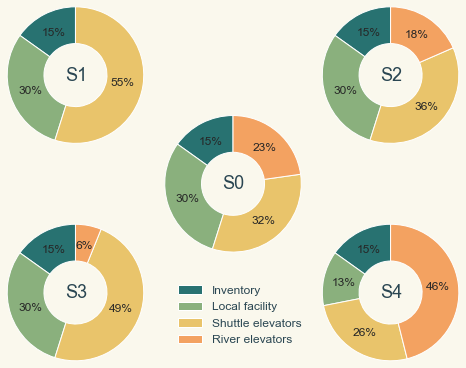

In [4]:
def pie(ax, rate, legs, leg=False):
    data0 = data.query('Rates == @rate')
    data0 = data0[['Year','Inventory', 'Quantity_X_Facility', 'Quantity_X_Country_Rail', 'Quantity_X_Country_Stream']].set_index('Year', drop=True)
    data0.loc['total'] = data0.apply(lambda x: x.sum())
    #data0.loc['perct'] = data0.loc['total'] / data0.loc['total'].sum()

    labels = ['Inventory', 'Local facility', 'Shuttle elevators', 'River elevators']
    colors = ['#287271','#8ab07d','#e9c46b','#f3a261']
    ax.pie(data0.loc['total'], 
           autopct = lambda p:f'{p:.0f}%' if p!=0 else '',
           textprops={'fontsize': 12},
           pctdistance = 0.70,
           colors = colors, 
           startangle = 90, 
           #shadow = True,
           wedgeprops = dict(width=0.7),
           radius = 1.3
          )
    
    ax.annotate(legs,(-0.2,-0.1), fontsize= 18, color='#2a4652')
    #ax.set_title(legs, pad=30)
    
    if leg == True:
        ax.legend(labels, 
                  loc="center left", 
                  bbox_to_anchor=(0.0, -0.5), 
                  facecolor='#faf8ed', 
                  edgecolor='#faf8ed',
                  fontsize = 12,
                  labelcolor='#2a4652',
                 )
    return data0


fig = plt.figure(figsize=(8, 8),facecolor='#faf8ed')
#fig.tight_layout()
gs = GridSpec(2, 3, hspace=0.0, wspace=0.2, width_ratios=[1,1,1])
#gs.update(left=0.55, right=0.98, hspace=0.05)

ax = plt.subplot(gs[0, 0])
data2 = pie(ax, '1_10_1_1', 'S1')

ax = plt.subplot(gs[0, 2])
data2 = pie(ax, '1_1_0.5_1', 'S2')

ax = plt.subplot(gs[:, 1])
data2 = pie(ax, '1_1_1_1', 'S0',True)

ax = plt.subplot(gs[1, 0])
data2 = pie(ax, '1_1_1_10', 'S3')

ax = plt.subplot(gs[1, 2])
data2 = pie(ax, '10_1_1_1', 'S4')

fig.savefig('./Figs/Fig_network_quantity.pdf', dpi=120, bbox_inches="tight")


,Inventory,Quantity_X_Facility,Quantity_X_Country_Rail,Quantity_X_Country_Stream
Year,,,,
1990,6766175089,4764017693,9403295779,16166289164
2005,9563064499,7152018384,14601220358,24380032821
2010,10518181544,7757187519,15265613190,26868094980
2015,11788341126,9156292276,18252001902,32113729465
2020,12713523168,10235684264,20506369439,36108832865
2025,14020830298,10880408656,22166630778,37390676024
2030,13774110893,11427319477,22300828907,41055557923
2035,13871949071,12222249569,24814338170,43671521294
2040,15019474306,13211256563,27060284247,46835299778


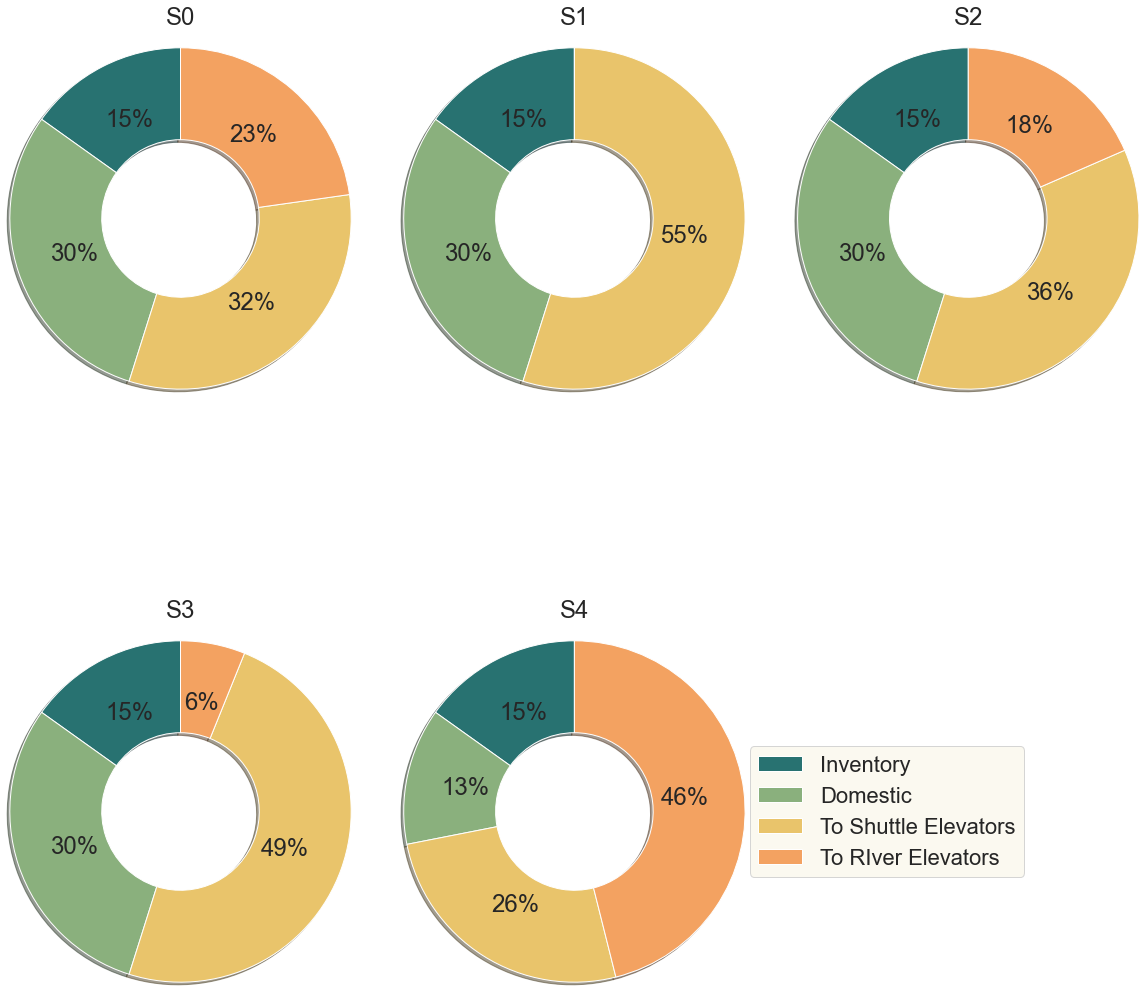

In [123]:
def pie(ax, rate, legs, leg=False):
    data0 = data.query('Rates == @rate')
    data0 = data0[['Year','Inventory', 'Quantity_X_Facility', 'Quantity_X_Country_Rail', 'Quantity_X_Country_Stream']].set_index('Year', drop=True)
    data0.loc['total'] = data0.apply(lambda x: x.sum())
    #data0.loc['perct'] = data0.loc['total'] / data0.loc['total'].sum()

    
    labels = ['Inventory', 'Domestic', 'To Shuttle Elevators', 'To RIver Elevators']
    colors = ['#287271','#8ab07d','#e9c46b','#f3a261']
    ax.pie(data0.loc['total'], 
           autopct = lambda p:f'{p:.0f}%' if p!=0 else '',
           pctdistance = 0.65,
           colors = colors, 
           startangle = 90, 
           shadow = True,
           wedgeprops = dict(width=0.7),
           radius = 1.3
          )
    
    ax.set_title(legs, pad=30)
    
    if leg == True:
        ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), facecolor='#faf8ed')
    return data0


plt.figure(figsize=(20, 20))
#plt.subplots_adjust(left=0.05, right=0.95)

ax = plt.subplot(231)
data2 = pie(ax, '1_1_1_1', 'S0')

ax = plt.subplot(232)
data2 = pie(ax, '1_10_1_1', 'S1')

ax = plt.subplot(233)
data2 = pie(ax, '1_1_0.5_1', 'S2')

ax = plt.subplot(234)
data2 = pie(ax, '1_1_1_10', 'S3')

ax = plt.subplot(235)
#data2 = pie(ax, '10_1_1_1',leg =True)
data2 = pie(ax, '10_1_1_1', 'S4', True)

data2

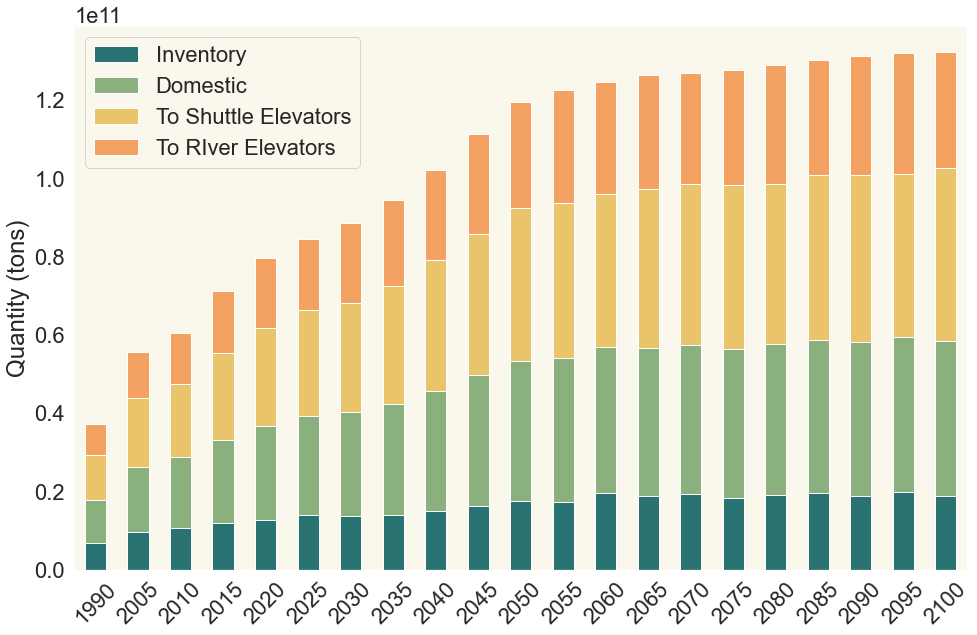

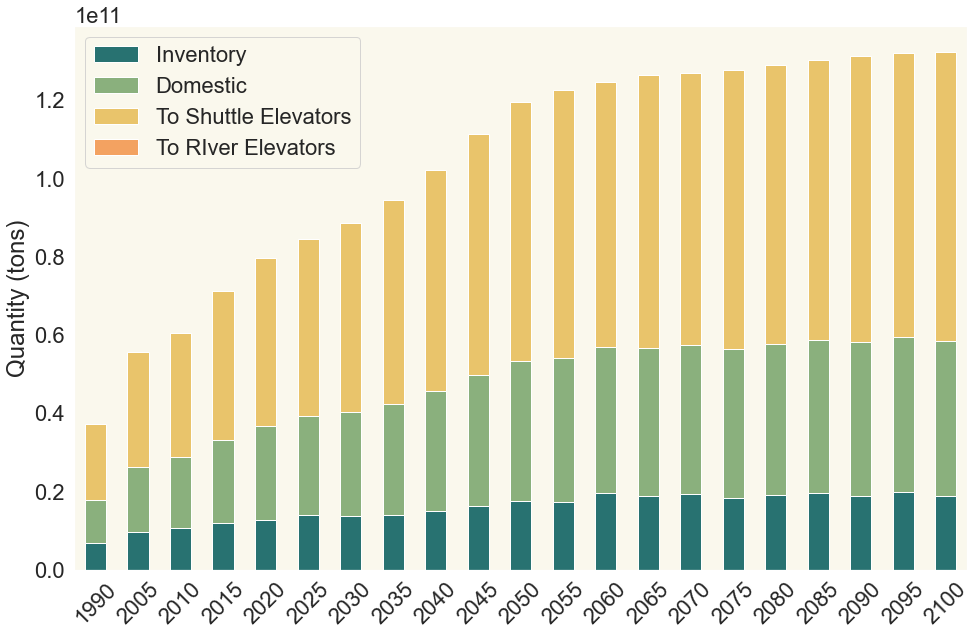

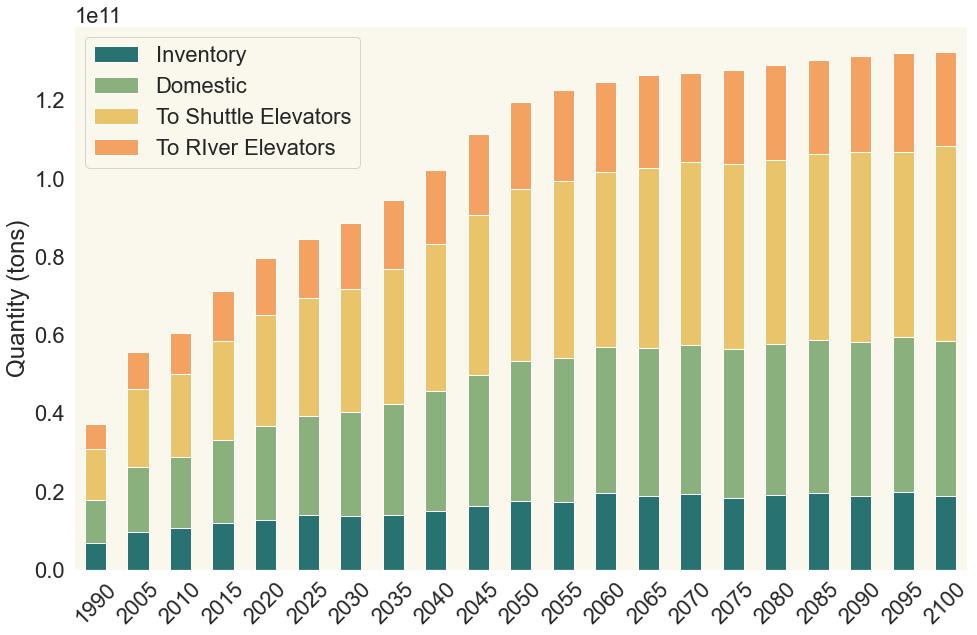

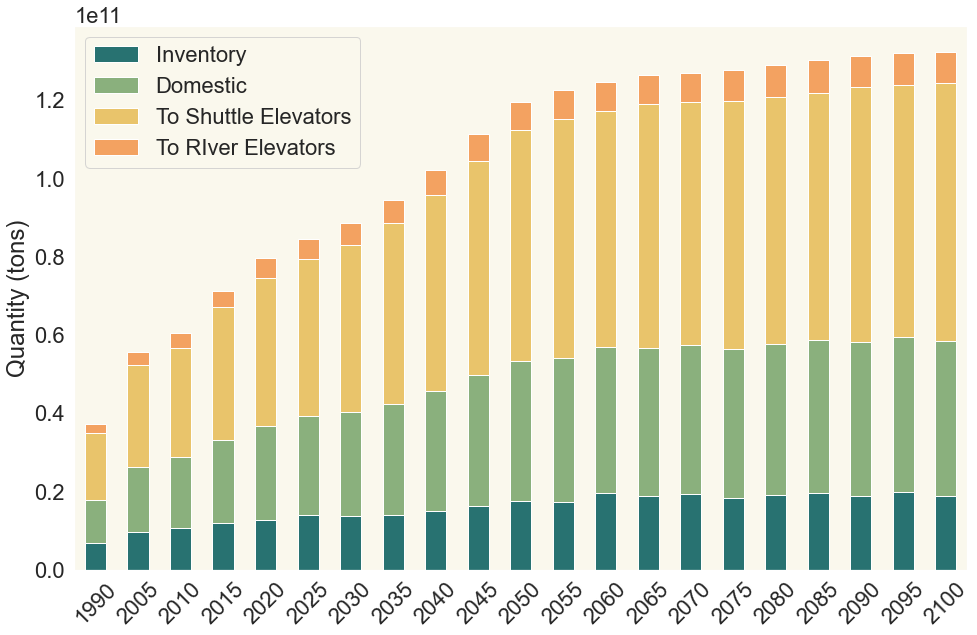

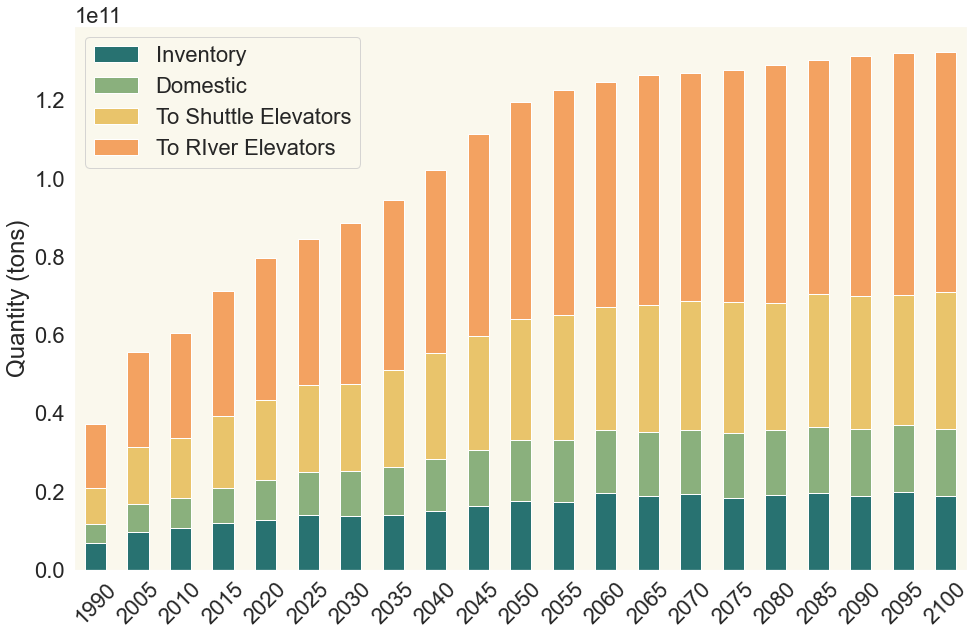

In [5]:
labels = ['Inventory', 'Domestic', 'To Shuttle Elevators', 'To RIver Elevators']
root = os.path.abspath('.')
path = root + '\Figs\\'
for col, rate in enumerate(Rates):
    fig, ax = plt.subplots(1, sharex='col', sharey='row', figsize=(16,10))
    data0 = data.query('Rates == @rate')
    data0 = data0[['Year','Inventory', 'Quantity_X_Facility', 'Quantity_X_Country_Rail', 'Quantity_X_Country_Stream']].set_index('Year', drop=True)
    data0.plot.bar(stacked=True, ax=ax, color=['#287271','#8ab07d','#e9c46b','#f3a261'])

    ax.set_facecolor('#faf8ed')
    #ax.set_title(rate, pad=10)
    ax.set_ylabel('Quantity (tons)')
    ax.grid(False)
    ax.legend(labels=labels, ncol=1, facecolor='#faf8ed')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set(xlabel=None)

    fig.savefig(path + 'Quantity_{}.pdf'.format(rate), dpi=300, bbox_inches="tight")


AttributeError: 'Rectangle' object has no property 'colors'

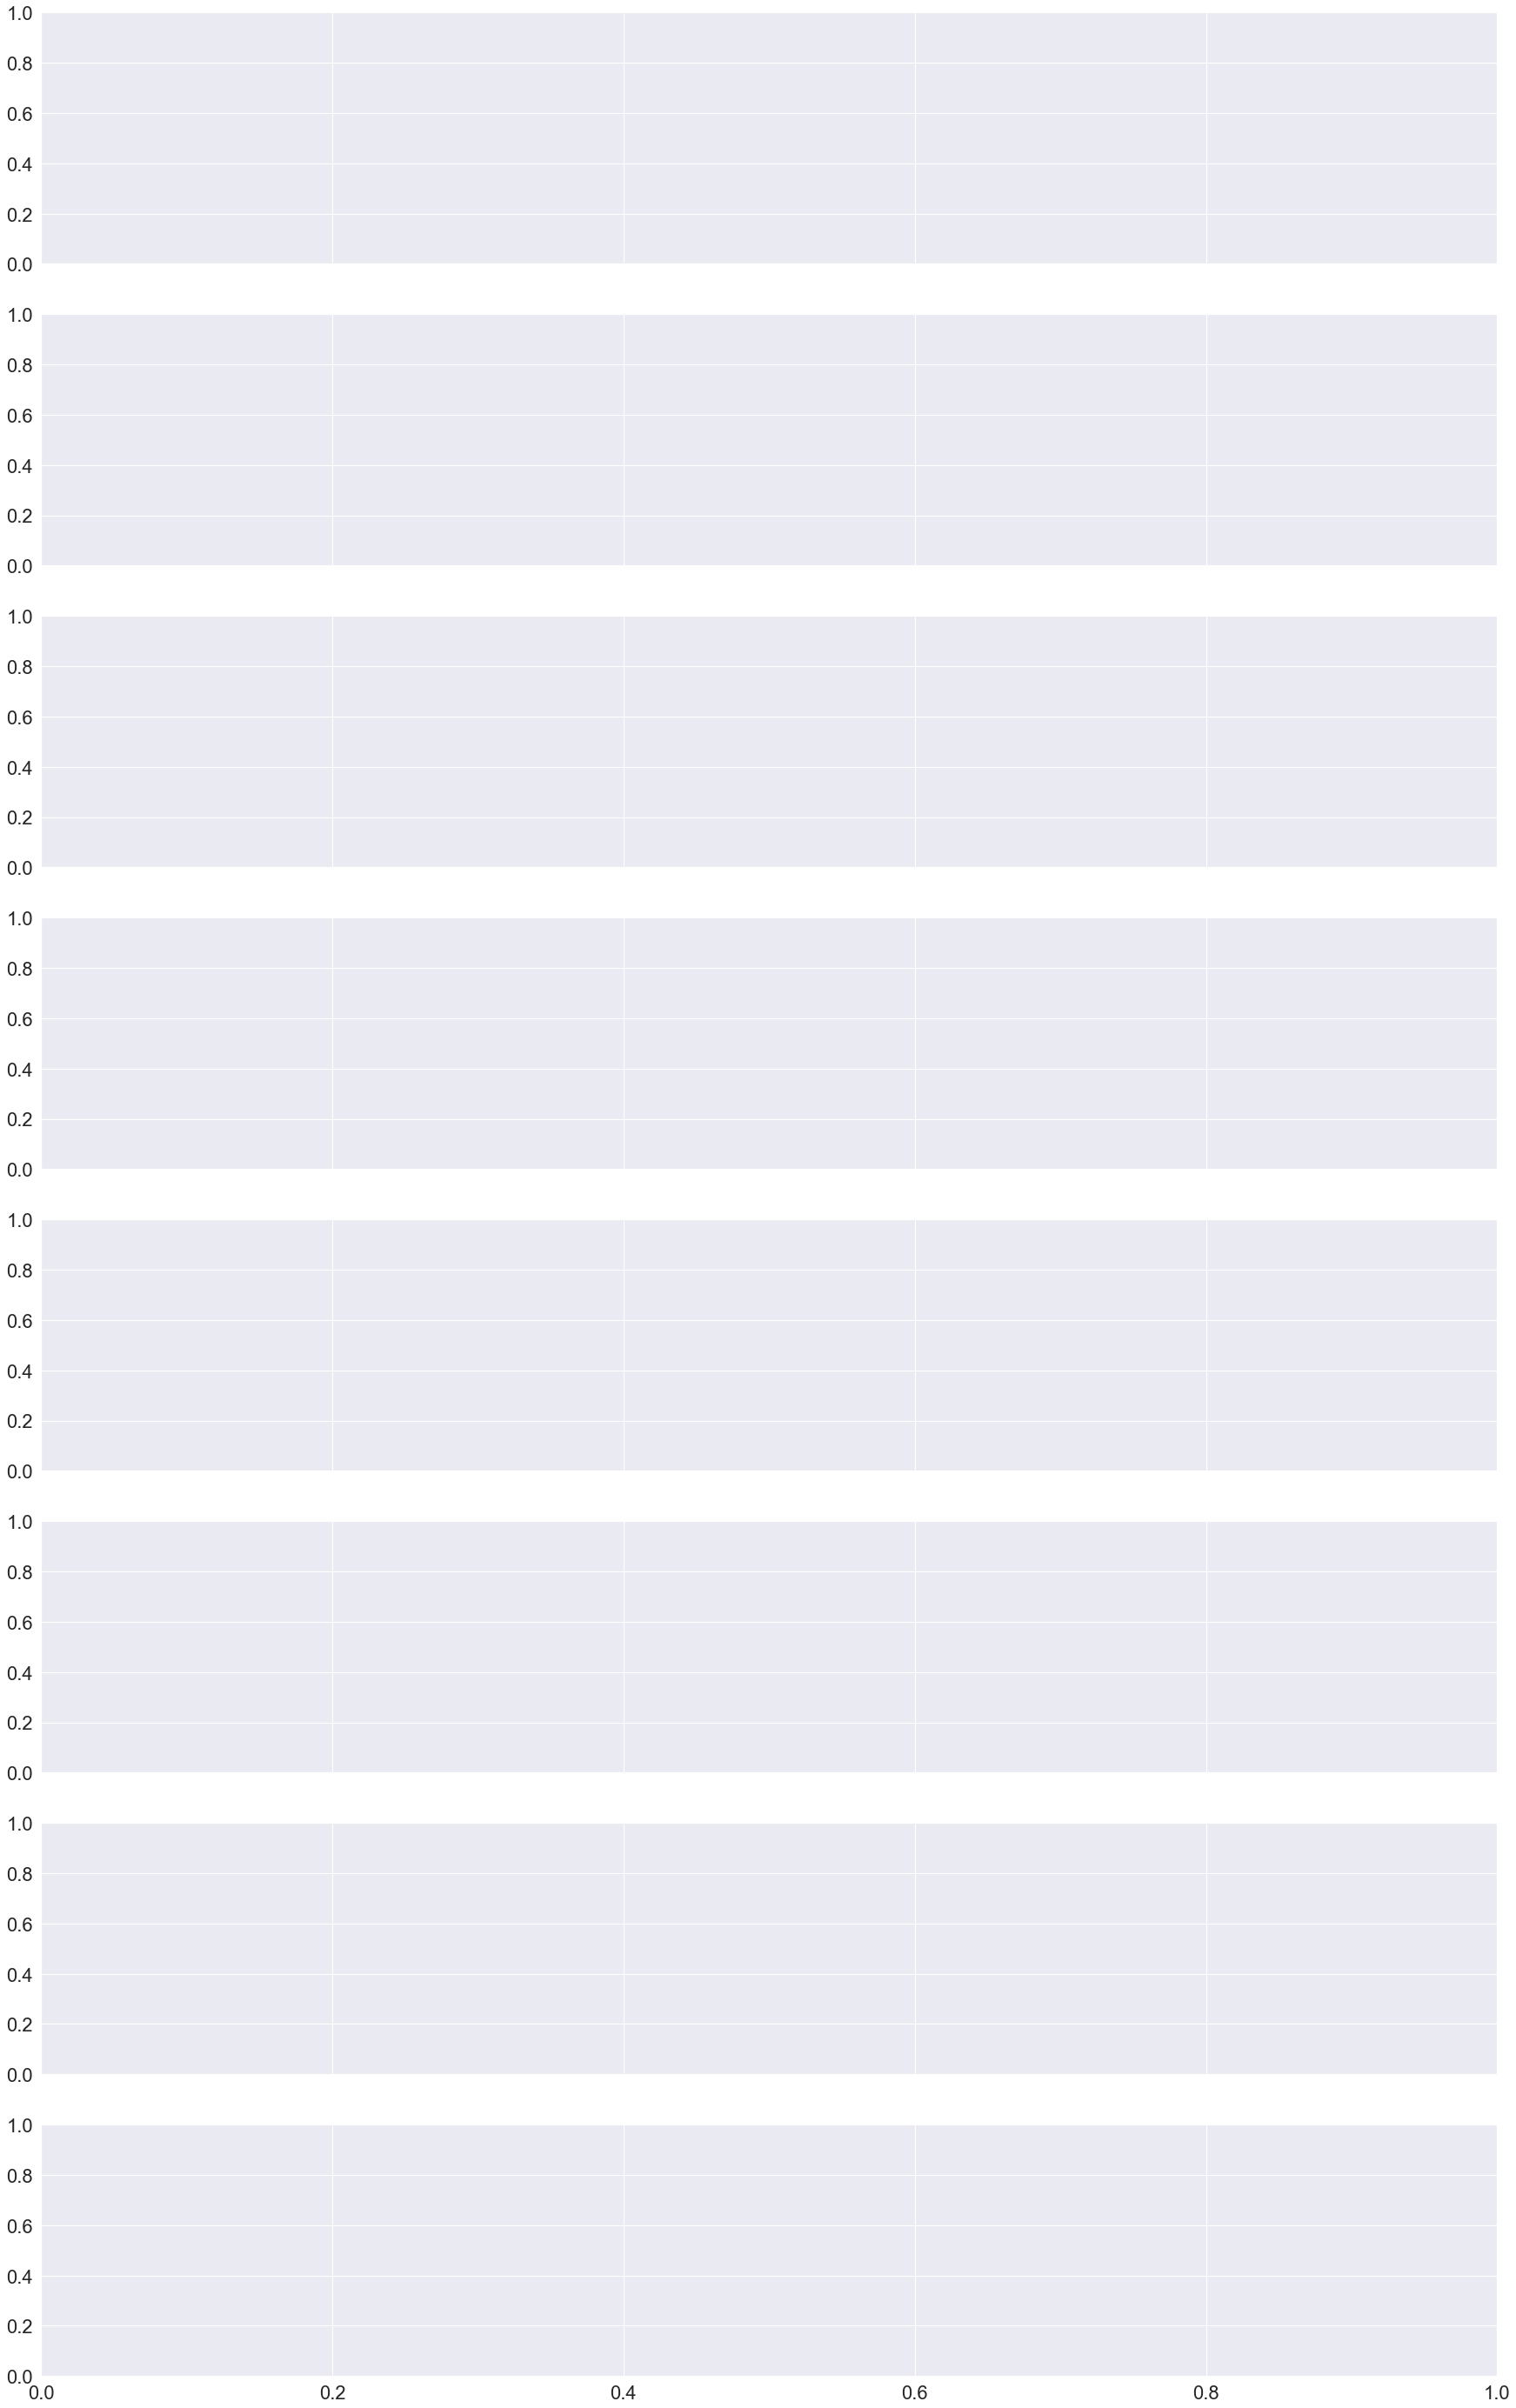

In [5]:
fig, ax = plt.subplots(8, 1, sharex='col', sharey='row', figsize=(30,50))
for col, rate in enumerate(Rates):
    data0 = data.query('Rates == @rate')
    data0.plot(x='Year', y='Inventory', kind='bar', ax=ax[col], label='Inventory', colors=['#287271'])
    data0.plot(x='Year', y='Quantity_X_Facility', kind='bar', ax=ax[col], bottom=data0['Inventory'], label='Domestic')
    data0.plot(x='Year', y='Quantity_X_Country_Rail', kind='bar', ax=ax[col], bottom=data0['Quantity_X_Facility'], label='Global_by_Rail')
    data0.plot(x='Year', y='Quantity_X_Country_Stream', kind='bar', ax=ax[col],  bottom=data0['Quantity_X_Country_Rail'], label='Global_by_River')